<a href="https://colab.research.google.com/github/rajivsresearch/SP500/blob/master/Bitcoin_Forecasting_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 8.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=55fd14f8868cba72cbeb34e6356b3b99274e3f210a8f6562a70f43207f5ec8dc
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   

In [3]:
def GetStockData(tickerSymbol, start, end):
  #get data on this ticker
  tickerData = yf.Ticker(tickerSymbol)

  #get the historical prices for this ticker
  tickerDf = tickerData.history(period='1d', start=start, end=end)

  #see your data
  return tickerDf[['Close']]

In [4]:
btc = GetStockData('BTC-USD', '2013-01-01', '2021-12-31')

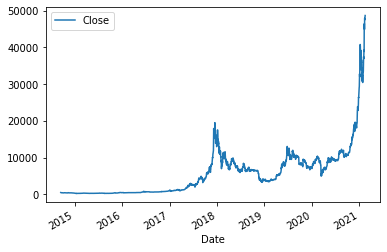

In [42]:
btc.plot()

In [6]:
def GetTrend(x,y):
  coef = np.polyfit(x,y,1)
  poly1d_fn = np.poly1d(coef) 
  return poly1d_fn(x), poly1d_fn

In [43]:
logbtc = np.log(btc)

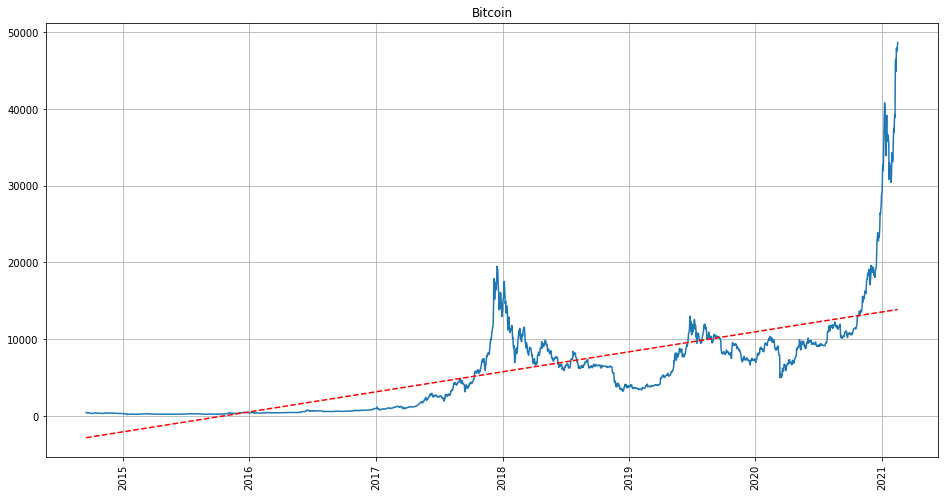

In [44]:
trend, fn = GetTrend(np.arange(0,len(btc)), btc.values.reshape(-1))

fig, axarr = plt.subplots(1,1,figsize=(16,8))

plt.title('Bitcoin')
plt.plot(btc.index.values, btc.values)
plt.plot(btc.index.values, trend, 'r--')

plt.xticks(rotation=90)
plt.grid()

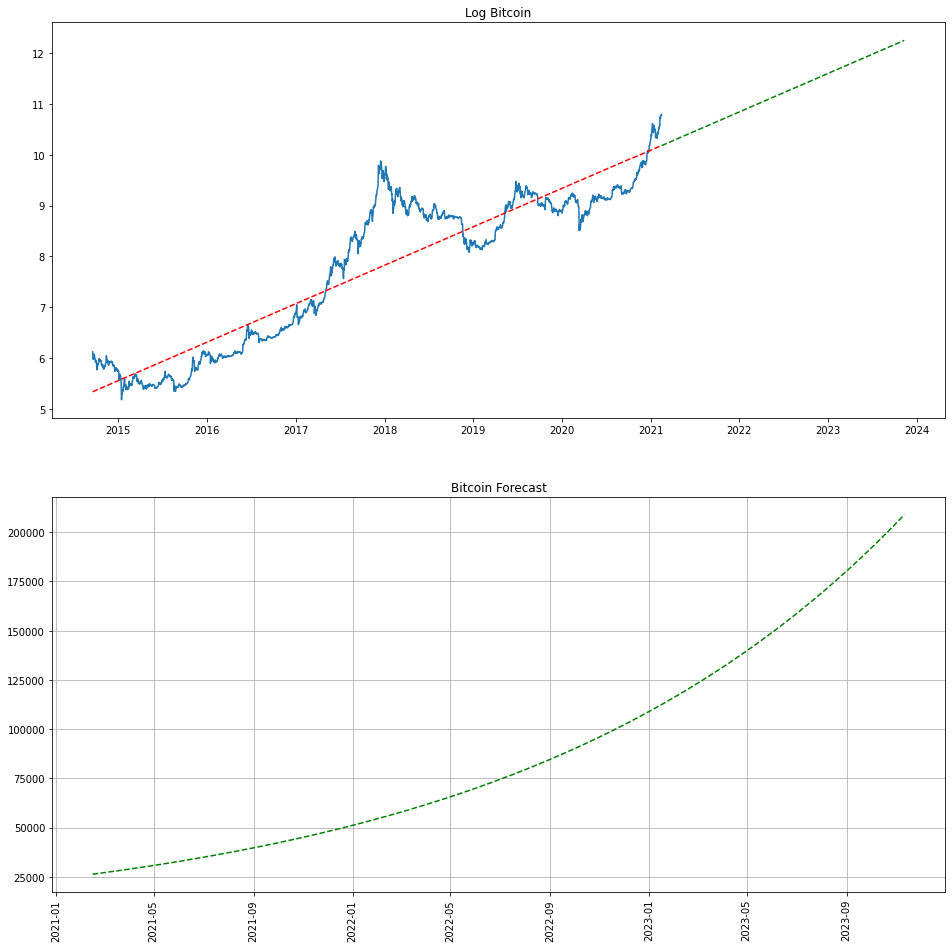

In [45]:
trend, fn = GetTrend(np.arange(0,len(logbtc)), logbtc.values.reshape(-1))
btcfuture = pd.DataFrame(index=pd.date_range(logbtc.index[-1], periods=1000))
btcfuture['Forecast'] = fn(np.arange(len(logbtc), len(logbtc)+len(btcfuture)))

fig, axarr = plt.subplots(2,1,figsize=(16,16))
plt.subplot(2,1,1)
plt.title('Log Bitcoin')
plt.plot(logbtc.index.values, logbtc.values)
plt.plot(logbtc.index.values, trend, 'r--')

plt.plot(btcfuture.index.values, btcfuture.values, 'g--')

plt.subplot(2,1,2)
plt.plot(btcfuture.index.values, np.exp(btcfuture.values), 'g--')
plt.title('Bitcoin Forecast')

plt.xticks(rotation=90)
plt.grid()

In [49]:
btcfuture1 = np.exp(btcfuture)

In [56]:
btcfuture1.loc[btcfuture1['Forecast']<=50000,:].iloc[-1]

Forecast    49947.608652
Name: 2021-12-20 00:00:00, dtype: float64

In [62]:
btcfuture1.head()

,Forecast
2021-02-15,26397.981342
2021-02-16,26452.692674
2021-02-17,26507.517398
2021-02-18,26562.455749
2021-02-19,26617.507963
